# USA HOUSE PRICE DATASET:

# Multiple Linear Regression using Basic Linear Regression and Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df=pd.read_csv('USA_Housing.csv')

# DATA:

In [3]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


# Data Information:

In [4]:
df.info()  #No NA values to replace

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Data Description:

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [6]:
#Dropping the Address Column as it is not a Categorical data:

In [7]:
df=df.drop(['Address'],axis=1)

In [8]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


# CORRELATION MATRIX:

In [9]:
corr=df.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


# CORRELATION HEATMAP:

<AxesSubplot:>

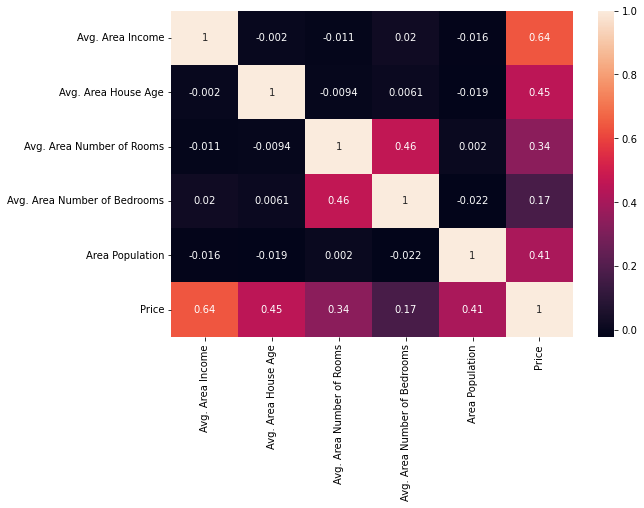

In [10]:
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True)

# Exploratory Data Analysis:

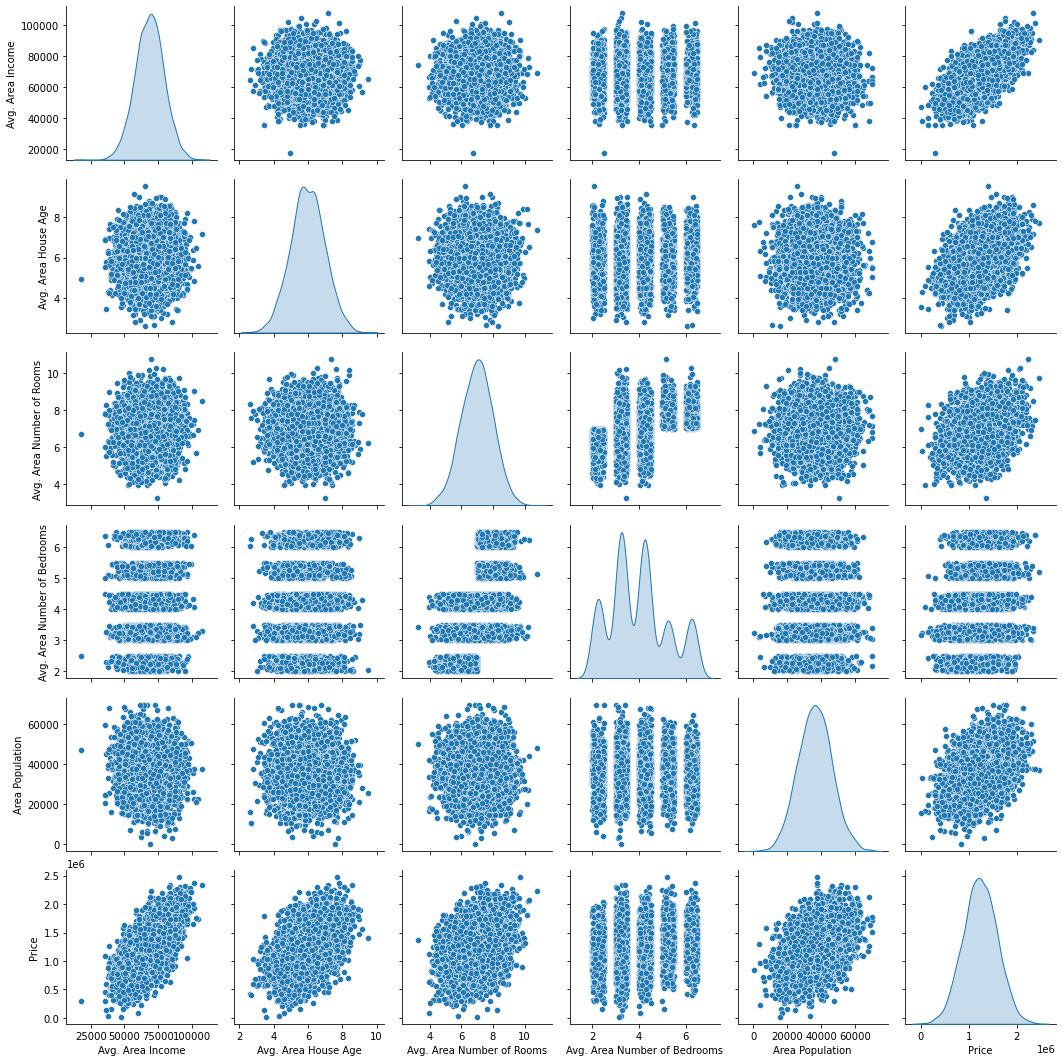

In [11]:
sns.pairplot(df,diag_kind = "kde",kind = "scatter")

<Figure size 792x504 with 0 Axes>

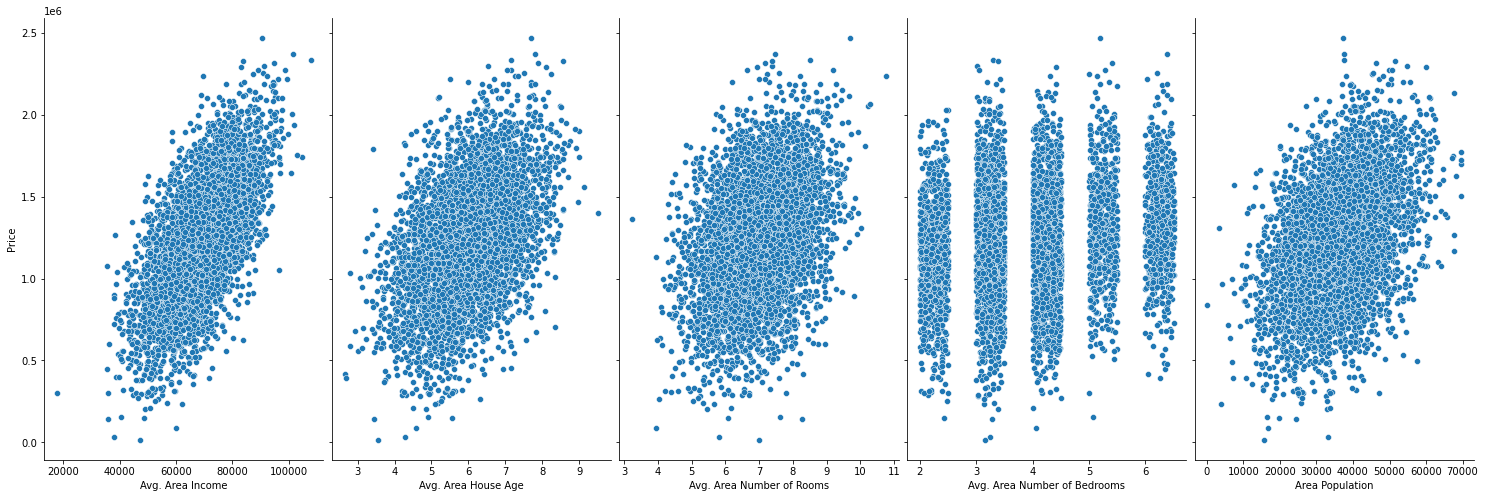

In [12]:
plt.figure(figsize=(11,7))
sns.pairplot(df,x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'],y_vars=['Price'],height=7,aspect=0.6,kind='scatter')
plt.ylabel('Price')
plt.show()

In [12]:
#EXCEPT AVG.AREA NUMBER OF BEDROOMS, ALL THE OTHER FACTORS ARE MODERATELY POSITIVELY ASSOCIATED WITH PRICE

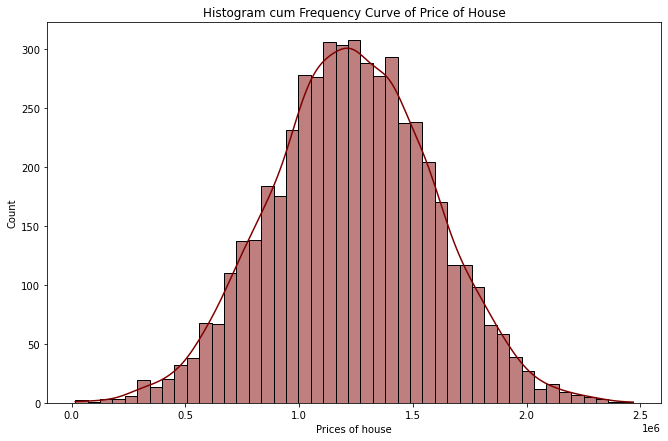

In [238]:
plt.figure(figsize=(11,7))
sns.histplot(df['Price'],color='maroon',kde='True')
plt.title('Histogram cum Frequency Curve of Price of House')
plt.xlabel('Prices of house')
plt.ylabel('Count')
plt.show()
#We can see that the prices of home is symmetrically distributed

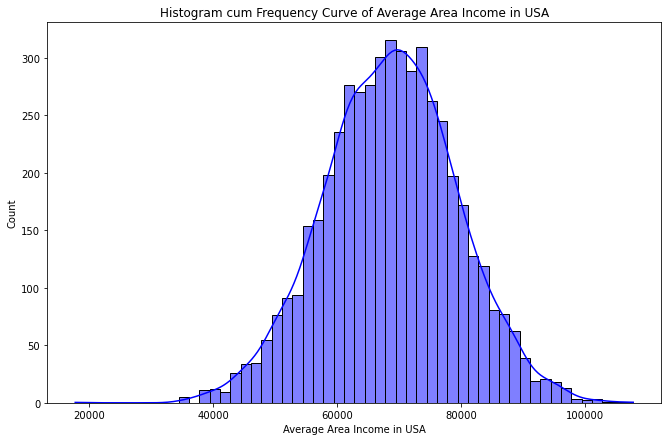

In [239]:
plt.figure(figsize=(11,7))
sns.histplot(df['Avg. Area Income'],kde='True',color='blue')
plt.title('Histogram cum Frequency Curve of Average Area Income in USA')
plt.xlabel('Average Area Income in USA')
plt.ylabel('Count')
plt.show()
#We can observe a negative skewness in the Average Area Income in USA

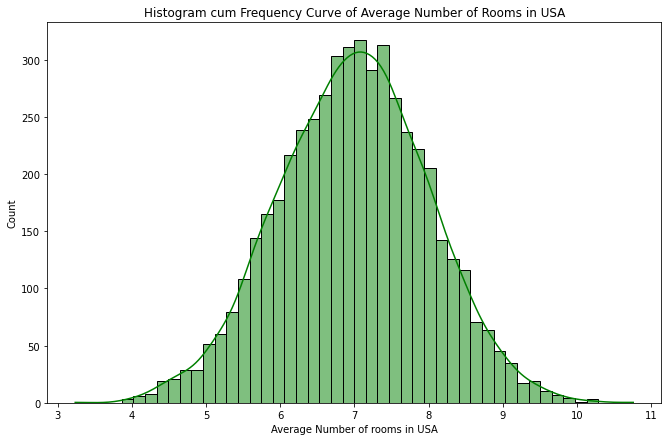

In [240]:

plt.figure(figsize=(11,7))
sns.histplot(df['Avg. Area Number of Rooms'],kde='True',color='green')
plt.title('Histogram cum Frequency Curve of Average Number of Rooms in USA')
plt.xlabel('Average Number of rooms in USA')
plt.ylabel('Count')
plt.show()
#We can see that Average number of rooms in USA is uniformly distributed

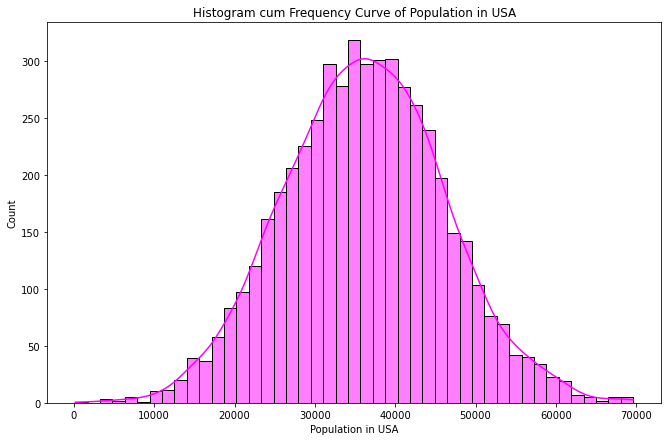

In [241]:
plt.figure(figsize=(11,7))
sns.histplot(df['Area Population'],kde='True',color='magenta')
plt.title('Histogram cum Frequency Curve of Population in USA')
plt.xlabel('Population in USA')
plt.ylabel('Count')
plt.show()
#We can see that the Population according to an Area is almost symmetrically distributed

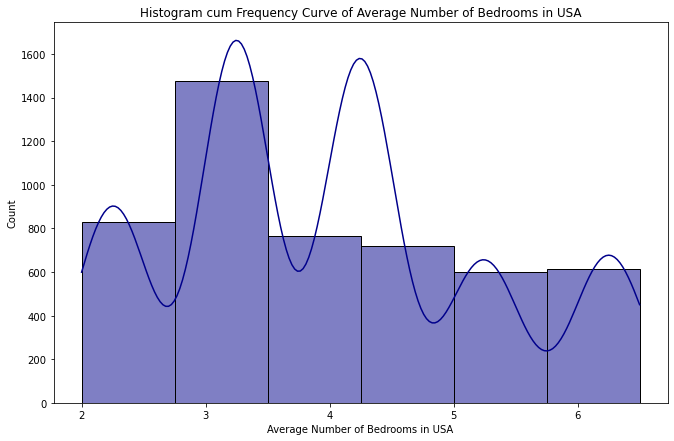

In [242]:
plt.figure(figsize=(11,7))
sns.histplot(df['Avg. Area Number of Bedrooms'],kde='True',color='darkblue',bins=6)
plt.title('Histogram cum Frequency Curve of Average Number of Bedrooms in USA')
plt.xlabel('Average Number of Bedrooms in USA')
plt.ylabel('Count')
plt.show()
#The Average Number of Bedrooms is multimodal in nature

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


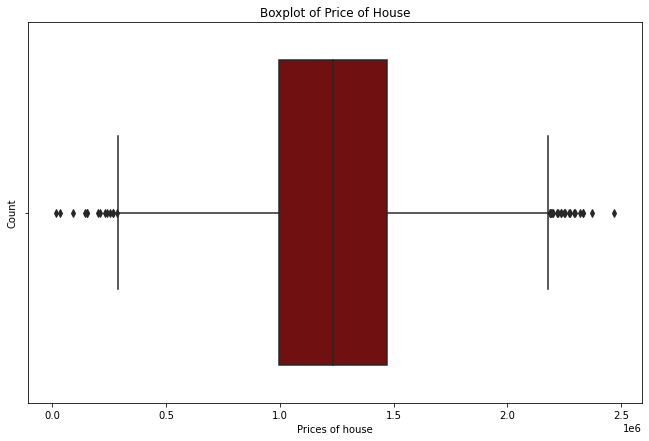

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


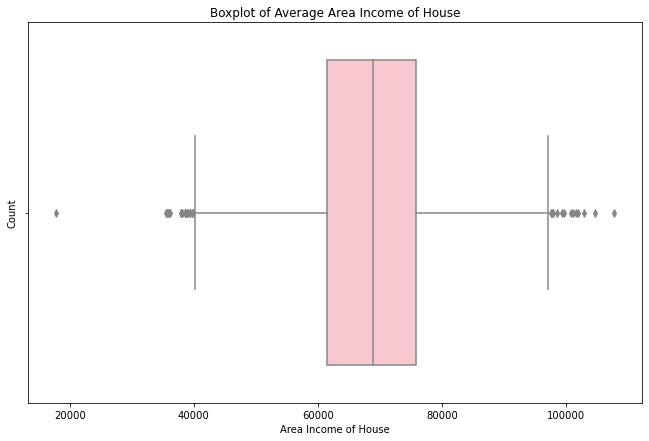

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


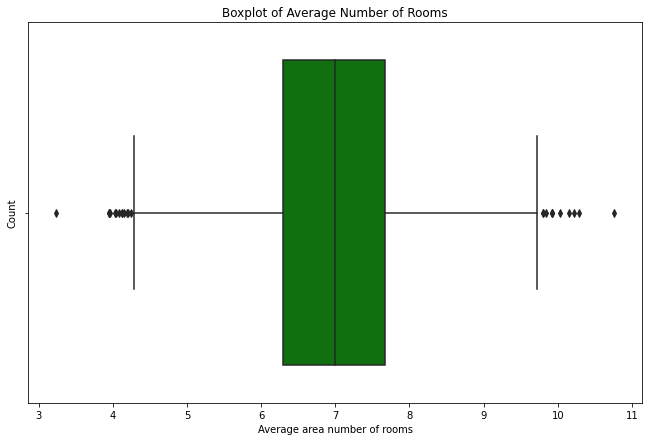

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


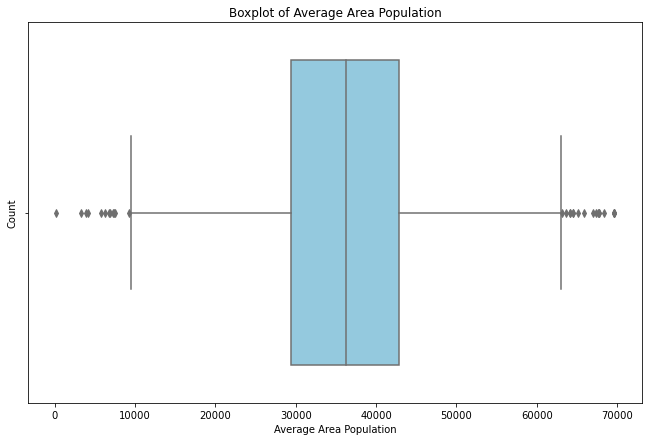

In [243]:
plt.figure(figsize=(11,7))
sns.boxplot(df['Price'],color='maroon')
plt.title('Boxplot of Price of House')
plt.xlabel('Prices of house')
plt.ylabel('Count')
plt.show()
#We can see that the prices of home is symmetrically distributed
plt.figure(figsize=(11,7))
sns.boxplot(df['Avg. Area Income'],color='pink')
plt.title('Boxplot of Average Area Income of House')
plt.xlabel('Area Income of House')
plt.ylabel('Count')
plt.show()
#We can see that the prices of home is symmetrically distributed
plt.figure(figsize=(11,7))
sns.boxplot(df['Avg. Area Number of Rooms'],color='green')
plt.title('Boxplot of Average Number of Rooms')
plt.xlabel('Average area number of rooms')
plt.ylabel('Count')
plt.show()
#We can see that the prices of home is symmetrically distributed
plt.figure(figsize=(11,7))
sns.boxplot(df['Area Population'],color='skyblue')
plt.title('Boxplot of Average Area Population')
plt.xlabel('Average Area Population')
plt.ylabel('Count')
plt.show()
#We can see that the prices of home is symmetrically distributed

# Simple Multiple linear Regression

In [12]:
reg=linear_model.LinearRegression() #FITTING
reg.fit(df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']],df.Price)

LinearRegression()

In [13]:
reg.coef_        #REGRESSION COEFFIECIENTS

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

In [14]:
reg.intercept_    #REGRESSION INTERCEPTS

-2637299.033331734

# Model without training our data set:

In [15]:
def Model1(AreaIncome,AreaHouseAge,AvgNoRooms,AvgNoBed,AreaPopln):
    return (2.15780494e+01*AreaIncome+1.65637027e+05*AreaHouseAge+1.20659949e+05*AvgNoRooms+1.65113905e+03*AvgNoBed+1.52007439e+01*AreaPopln-2637299.033331735)


print(Model1(80000,6,7,4,23000))


1283608.389568265


# NOW WE TRAIN OUR MODEL:

# Training dataset:

In [16]:
#Standardizing our data as independent variables have different weightage and units:

In [17]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

In [18]:
X = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=df['Price']

In [19]:
X = pd.DataFrame(pre_process.fit_transform(X))

In [20]:
X.head()               #Standardized X variables

,0,1,2,3,4
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [21]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [22]:
#Training our data:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3,random_state=2)
#We take 70% of data as our training set and rest as testing dataset

In [24]:
print(X_train.shape)           #Shape of Training Dataset:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [26]:
reg.fit(X_train, y_train) #Fitting our data with respect to training X and y Variables

LinearRegression()

In [27]:
#Intercept and Coefficients of the standardized model:

In [28]:
print(reg.coef_)
print(reg.intercept_)

[229275.2240371  163592.48713934 120113.25335228   3015.8475684
 150556.34029689]
1231006.3190627624


# Standardized Model:

In [29]:
def model2(AreaIncome,AreaHouseAge,AvgNoRooms,AvgNoBed,AreaPopln):
    return (229275.2240371*AreaIncome+163592.48713934*AreaHouseAge+120113.25335228*AvgNoRooms+3015.8475684*AvgNoBed+150556.34029689*AreaPopln+1231006.3190627624)


print(model2(1.02,-0.3,0.02,0.088,-1.32))


1219722.5918999724


In [30]:
y_pred = reg.predict(X_test) #Predicting with respect to testing dataset

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [32]:
print('Mean_Squared_Error :' ,mse)        #Mean Squared Error
print('r_square_value :',r_squared)       #Performance Metrics of model:R square(showing 91.992% accuracy with high MSE)

Mean_Squared_Error : 9831074698.505758
r_square_value : 0.919928795973803


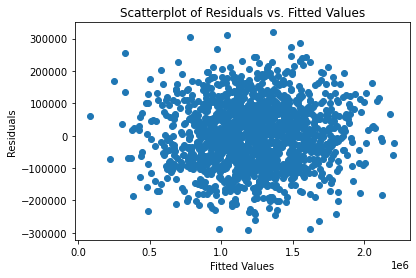

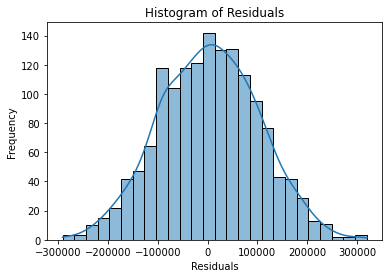

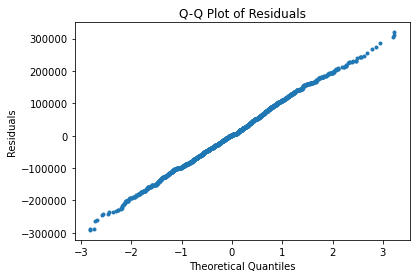

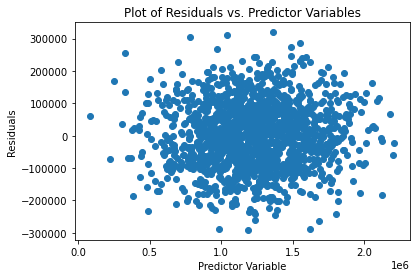

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Scatterplot of Residuals vs. Fitted Values
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Fitted Values')
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot of Residuals
residuals_sorted = np.sort(residuals)
norm = np.random.normal(0, 1, len(residuals))
norm_sorted = np.sort(norm)
plt.plot(norm_sorted, residuals_sorted, marker='.', linestyle='none')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot of Residuals vs. Predictor Variables
plt.scatter(y_pred, residuals)
plt.xlabel('Predictor Variable')
plt.ylabel('Residuals')
plt.title('Plot of Residuals vs. Predictor Variables')
plt.show()


# ROOT MEAN SQUARED ERROR:

In [34]:
from math import sqrt

rms = sqrt(mse)
rms

99151.77607338034

# MSE is high so we check further

In [35]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const    1.231006e+06
0        2.292752e+05
1        1.635925e+05
2        1.201133e+05
3        3.015848e+03
4        1.505563e+05
dtype: float64

In [36]:
#Ho:Coefficient is insignificant
#H1:Coefficient is significant

#We get that p-value>0.05, we rejected the coefficient for avg.no of bedrooms.

In [37]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     7739.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:22:23   Log-Likelihood:                -45329.
No. Observations:                3500   AIC:                         9.067e+04
Df Residuals:                    3494   BIC:                         9.071e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.231e+06   1724.695    713.753      0.0

In [38]:
# So we drop Average Number of Bedrooms as it has p-value=0.123 and being insignificant
# Model having low auto correlation as Durbin-Watson:2.046 and low multicollinearity(Cond. No:1.65) 
# So we can leave the model as it is but we dropping Avg.Number of Bedrooms as it has a low coefficient
#as well as it is insignificant  

In [39]:
#Data without standardizing our variables:

In [40]:
X1=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y1=df['Price']

In [41]:
X1.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [42]:
y1.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.7 ,test_size = 0.3,random_state=2)
#We take 70% of data as our training set and rest as testing dataset

In [44]:
print(X1_train.shape)  #Shape of training data
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(3500, 4)
(1500, 4)
(3500,)
(1500,)


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [46]:
reg.fit(X1_train, y1_train)   #Fitting our data with respect to training X and y Variables

LinearRegression()

In [47]:
#Intercept and Coefficients of the standardized model:

In [48]:
print(reg.coef_)
print(reg.intercept_)

[2.15179145e+01 1.65028315e+05 1.20794172e+05 1.51626149e+01]
-2623603.8683841582


In [49]:
y1_pred = reg.predict(X1_test)    #Predicting with respect to testing dataset

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y1_test, y1_pred)
r_squared1 = r2_score(y1_test, y1_pred)

In [51]:
print('Mean_Squared_Error :' ,mse1)    #Mean Squared Error
print('r_square_value :',r_squared1)   #Performance Metrics of model:R square(showing 91.999% accuracy with relatively lower MSE)

Mean_Squared_Error : 9823431324.122812
r_square_value : 0.9199910490039582


# Root Mean Squared Error:

In [52]:
from math import sqrt

rms = sqrt(mse1)
rms

99113.22476906305

# Improved Model:
# Price=21.5179145 x AreaIncome + 165028.315 x AreaHouseAge +120794.172e+05 x AvgNoRooms+15.1626149 x AreaPopln -2623603.8683841582

# ROOT MEAN SQUARE : 99113.22476906306
# R_Square : 0.9199910490039582


In [53]:
def model3(AreaIncome,AreaHouseAge,AvgNoRooms,AreaPopln):
    return (2.15179145e+01* AreaIncome +  1.65028315e+05* AreaHouseAge +1.20794172e+05* AvgNoRooms+1.51626149e+01* AreaPopln -2623603.8683841582)


print(model3(80000,6,7,23000))


1282298.5283158412


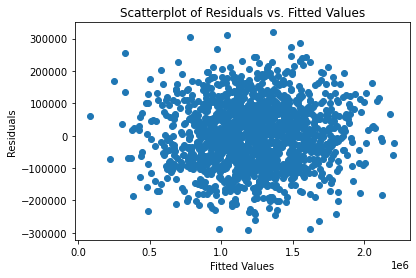

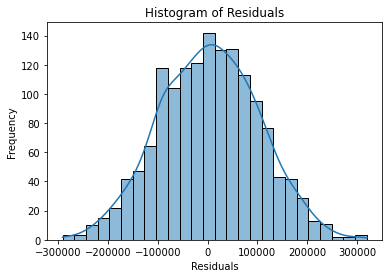

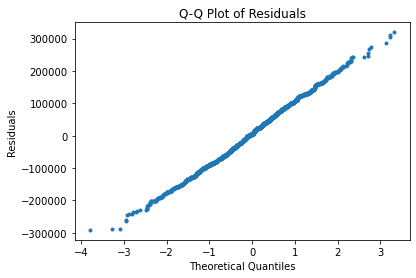

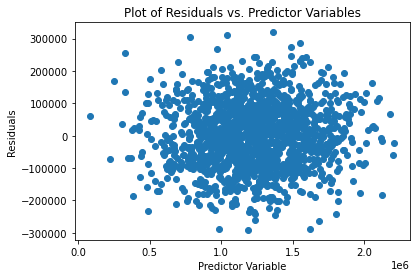

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Scatterplot of Residuals vs. Fitted Values
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Fitted Values')
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot of Residuals
residuals_sorted = np.sort(residuals)
norm = np.random.normal(0, 1, len(residuals))
norm_sorted = np.sort(norm)
plt.plot(norm_sorted, residuals_sorted, marker='.', linestyle='none')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot of Residuals vs. Predictor Variables
plt.scatter(y_pred, residuals)
plt.xlabel('Predictor Variable')
plt.ylabel('Residuals')
plt.title('Plot of Residuals vs. Predictor Variables')
plt.show()


#The distribution of residuals follows normal distribution and hence the error of the data is homoscedastic

In [55]:
#Dropping Outliers:

In [56]:
import pandas as pd

#Calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

#Delete rows with outliers
df_filtered = df[~outliers]

#Print the filtered dataset
print(df_filtered)


      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09      230

In [57]:
outliers.value_counts()

False    4865
True      135
dtype: int64

In [58]:
df=df_filtered
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [59]:
X=df.iloc[:,:5]
y=df.iloc[:,5:]

In [60]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [61]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3,random_state=2)
#We take 70% of data as our training set and rest as testing dataset

In [63]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [64]:
reg.fit(X_train, y_train)   #Fitting our data with respect to training X and y Variables

LinearRegression()

In [65]:
y_pred = reg.predict(X_test) #Predicting with respect to testing dataset

In [66]:
reg.coef_

array([[2.16689414e+01, 1.64057570e+05, 1.20246015e+05, 2.91270092e+03,
        1.51505254e+01]])

In [67]:
reg.intercept_

array([-2633693.30335291])

In [68]:
y_test.shape

(1460, 1)

In [69]:
y_pred.shape

(1460, 1)

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred)
r_squared1 = r2_score(y_test, y_pred)

In [71]:
print('Mean_Squared_Error :' ,mse1)    #Mean Squared Error
print('r_square_value :',r_squared1)   #Performance Metrics of model:R square(showing 91.37% accuracy with relatively lower MSE)

Mean_Squared_Error : 9907125637.078297
r_square_value : 0.913706376404202


In [72]:
from math import sqrt

rms = sqrt(mse1)
rms

99534.54494334264

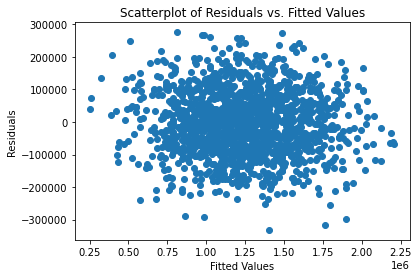

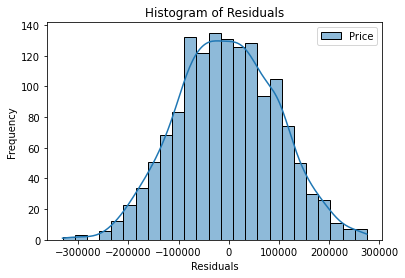

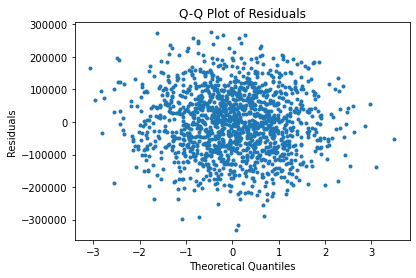

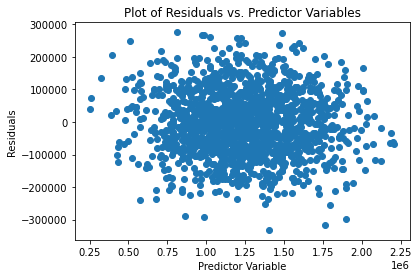

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Scatterplot of Residuals vs. Fitted Values
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Scatterplot of Residuals vs. Fitted Values')
plt.show()

# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q Plot of Residuals
residuals_sorted = np.sort(residuals)
norm = np.random.normal(0, 1, len(residuals))
norm_sorted = np.sort(norm)
plt.plot(norm_sorted, residuals_sorted, marker='.', linestyle='none')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Plot of Residuals vs. Predictor Variables
plt.scatter(y_pred, residuals)
plt.xlabel('Predictor Variable')
plt.ylabel('Residuals')
plt.title('Plot of Residuals vs. Predictor Variables')
plt.show()
